In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import src.helpers as helpers
import src.modeling as modeling
import src.plotting as plotting

# Simulate data

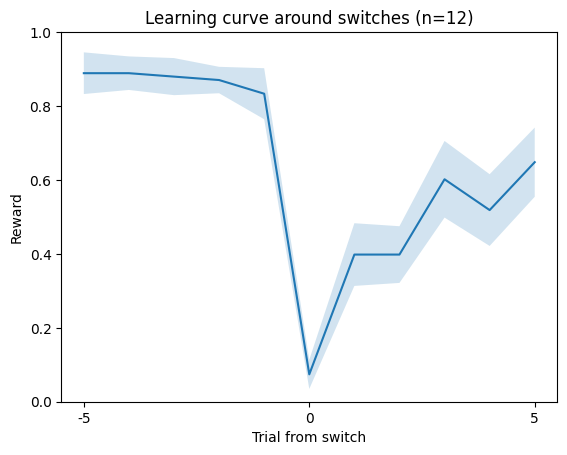

In [4]:
# Define the task environment
env_name = 'ProbabilisticReversalEnvironment'
states = [0]
actions = [0, 1]
n_trials_per_episode = 50
n_episodes = 10
p_reward_correct = 1
p_reward_incorrect = 0
env_class = getattr(modeling, env_name)
env = env_class(states, actions, n_trials_per_episode, n_episodes, p_reward_correct, p_reward_incorrect)

# Define the generative model
model_name = 'StickyRLModel'
param_names = ['alpha', 'beta', 'stickiness']
param_bounds = [[1e-6, 1], [1e-6, 10], [-1, 1]]
model_class = getattr(modeling, model_name)
agent = model_class(env, param_names, param_bounds)

# Simulate data
n_participants = 12
n_iters = 1
data = agent.simulate(n_participants, n_iters)

# Plot behavior
plotting.plot_switch_learning_curve(data)


# Fit models

In [5]:
# Define the models to fit
model_names = ['RLModel', 'StickyRLModel']
param_names = [['alpha', 'beta'], ['alpha', 'beta', 'stickiness']]
param_bounds = [[[1e-6, 1], [1e-6, 10]], [[1e-6, 1], [1e-6, 10], [-1, 1]]]

# Define the optimizer
optimizer = modeling.Optimizer()
optimization_method = 'mle'
# Fit the models
best_params_all, best_nllh_all = optimizer.fit(env, data, model_names, param_names, param_bounds, optimization_method)

Fitting 2 models with 12 participants using mle method
Using at most 8 parallel processes
Model 0, participant 0: best_nllh = 218.880974187971
Model 0, participant 1: best_nllh = 196.20688664239012
Model 0, participant 2: best_nllh = 210.66356021032462
Model 0, participant 5: best_nllh = 344.0838019296071
Model 0, participant 8: best_nllh = 179.41820298761348
Model 0, participant 7: best_nllh = 129.14230490995848
Model 0, participant 11: best_nllh = 120.57126664785052
Model 1, participant 0: best_nllh = 218.1882272219732
Model 1, participant 1: best_nllh = 108.54687305027934
Model 1, participant 2: best_nllh = 190.19690770878955
Model 1, participant 5: best_nllh = 344.0171419417116
Model 1, participant 4: best_nllh = 74.67231696284398
Model 1, participant 6: best_nllh = 67.95490888412674
Model 1, participant 8: best_nllh = 169.51224418239678
Model 1, participant 9: best_nllh = 131.49169640129332
Model 1, participant 10: best_nllh = 63.88044029571179
Model 1, participant 11: best_nllh =

# Compute fit metrics

RLModel and StickyRLModel fit significantly different by AIC (p=0.002).
RLModel and StickyRLModel fit significantly different by BIC (p=0.007).


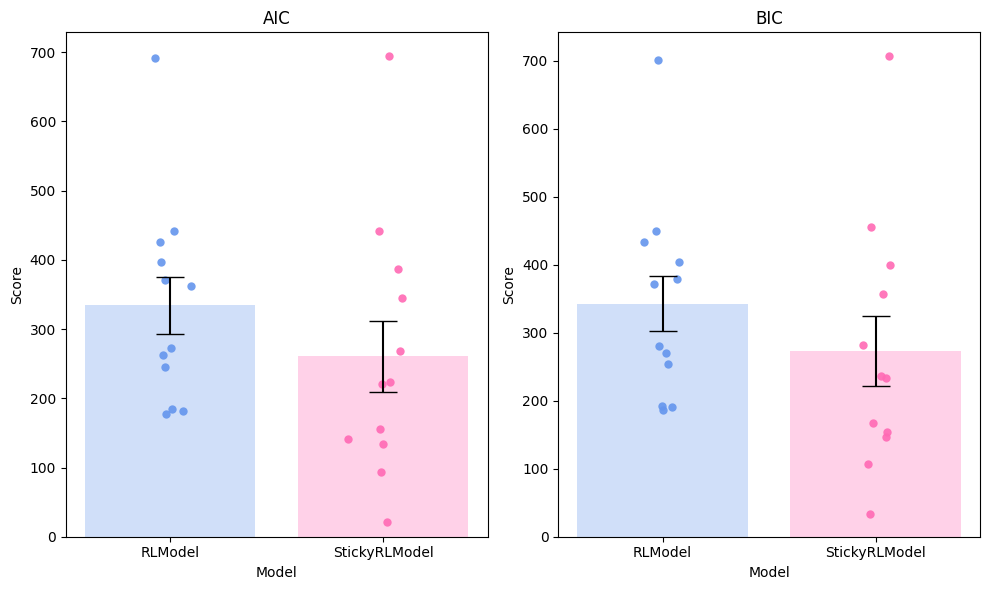

In [16]:
metrics = ["AIC", "BIC"]
plotting.plot_fit_metric(data, optimizer, best_nllh_all, model_names, param_names, metrics)